In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
import sys

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [3]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
print(X_train.reshape(X_train.shape[0], -1).shape)
print(X_test.reshape(X_test.shape[0], -1).shape)


# 2차원으로 변경
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

(60000, 784)
(10000, 784)


In [5]:
X_train.dtype # 현재 데이터 타입 확인

dtype('uint8')

In [6]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255  # float로 데이터 타입 변경


# X_train = to_categorical(X_train,10)
# X_test = to_categorical(X_test, 10)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



In [7]:
early_stop = EarlyStopping(monitor='val_loss', verbose=0, patience=10)

model = Sequential()  # flatten= 사용 가능
model.add(Dense(500, activation='relu', input_dim=X_train.shape[1]))
# model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=100, batch_size=500, validation_split=0.25, callbacks=[early_stop],verbose=1)

print(model.evaluate(X_test, y_test))

Epoch 1/100
90/90 [==============================] - 3s 22ms/step - loss: 0.4822 - accuracy: 0.8693 - val_loss: 0.2428 - val_accuracy: 0.9343
Epoch 2/100
90/90 [==============================] - 2s 19ms/step - loss: 0.2087 - accuracy: 0.9414 - val_loss: 0.1800 - val_accuracy: 0.9495
Epoch 3/100
90/90 [==============================] - 1s 16ms/step - loss: 0.1494 - accuracy: 0.9582 - val_loss: 0.1487 - val_accuracy: 0.9581
Epoch 4/100
90/90 [==============================] - 1s 16ms/step - loss: 0.1155 - accuracy: 0.9679 - val_loss: 0.1312 - val_accuracy: 0.9616
Epoch 5/100
90/90 [==============================] - 1s 15ms/step - loss: 0.0927 - accuracy: 0.9742 - val_loss: 0.1171 - val_accuracy: 0.9662
Epoch 6/100
90/90 [==============================] - 2s 18ms/step - loss: 0.0749 - accuracy: 0.9796 - val_loss: 0.1141 - val_accuracy: 0.9666
Epoch 7/100
90/90 [==============================] - 2s 17ms/step - loss: 0.0622 - accuracy: 0.9829 - val_loss: 0.1013 - val_accuracy: 0.9697
Epoch 

In [8]:
x_loss,x_acc=model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0698 - accuracy: 0.9805


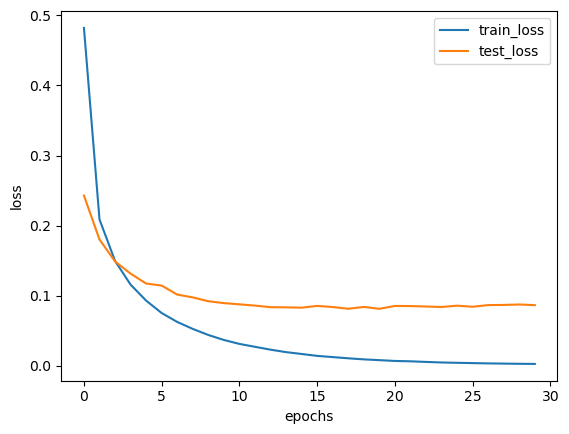

In [9]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_loss, label='train_loss')
plt.plot(x_len, y_vloss, label='test_loss')
plt.legend(loc='upper right')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()